# Wiktor Ciołek 311501 SATFD laboratory 2 23.03.2024

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal.windows as wd
from scipy.io import wavfile
plt.rcParams['axes.grid'] = True

# 1. Introduction
The exercise presented in this report consists of presenting different approaches to tranforming signal from its time domain into frequency spectrum. Each particular cell provides methods of applying various alterations to the data to obtain desired results. Every transformation is described. In some cases a comment on the meaning and applications of such method is provided.


# 2. Data display function
The function provided in the susequent cell takes a signal array, rate of its aquairement and some additional aesthetic arguments. It displays two plots next to each other - original data and fast fourier algorithm applied to it with *numpy.fft.fft()* function. It is used every time a certain signal is to be presented

In [192]:
def plot_signal(X_signal, sample_rate, title:str, xlim = None):
    n = len(X_signal)
    T = np.arange(n) / sample_rate
    freqs = np.fft.fftfreq(n, 1 / sample_rate)
    spectrum = np.abs(np.fft.fft(X_signal))

    fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
    ax[0].set_xlabel("t [s]", fontsize=16)
    ax[0].set_ylabel("Power", fontsize=16)
    ax[1].set_xlabel("f [Hz]", fontsize=16)
    ax[1].set_ylabel("Power", fontsize=16)
    
    if xlim is not None:
        ax[1].set_xlim(xlim)

    ax[0].plot(T, X_signal, 'k-', linewidth=0.8, markersize = 5)
    ax[1].plot(freqs, spectrum, 'r-')

    fig.suptitle(title, fontsize=22)

# Sine signal and window functions
A sine wave is generated as a base signal for analysis. Three of its parameters are of crucial importance:
* t - length of the signal in seconds
* dt - data points per second (i. e. sampling rate)
* f - sine wave frequency in hertz
Given the fact that such signal can undergo certain adjustments, few of them are considered:
1. FFT of **rectangular signal** is plotted. One should notice that many frequncies are represented in such signal which is a result of its multi-element Fourier series representation. The frequencies are discrete and the greater the frequency the lower is the power observed
2. **rectangular signal + sine**. A functional multiplication of rectangular and sine signal is performed. It can be shown that the resulting power spectrum is a FFT of a convolution of those functions.
3. Another, non-rectangular window is considered, namely the **Hamming window** provided by *scipy.signal* library. Its spectrum is represented by one peak centered at zero.
4. **Hamming window + sine**. Application of Hamming window to the signal doesn't add any frequncies to the signal. Moreover, it can help to ephesize some part of the signal. Its drawback is a lower resulotion of the power spectrum

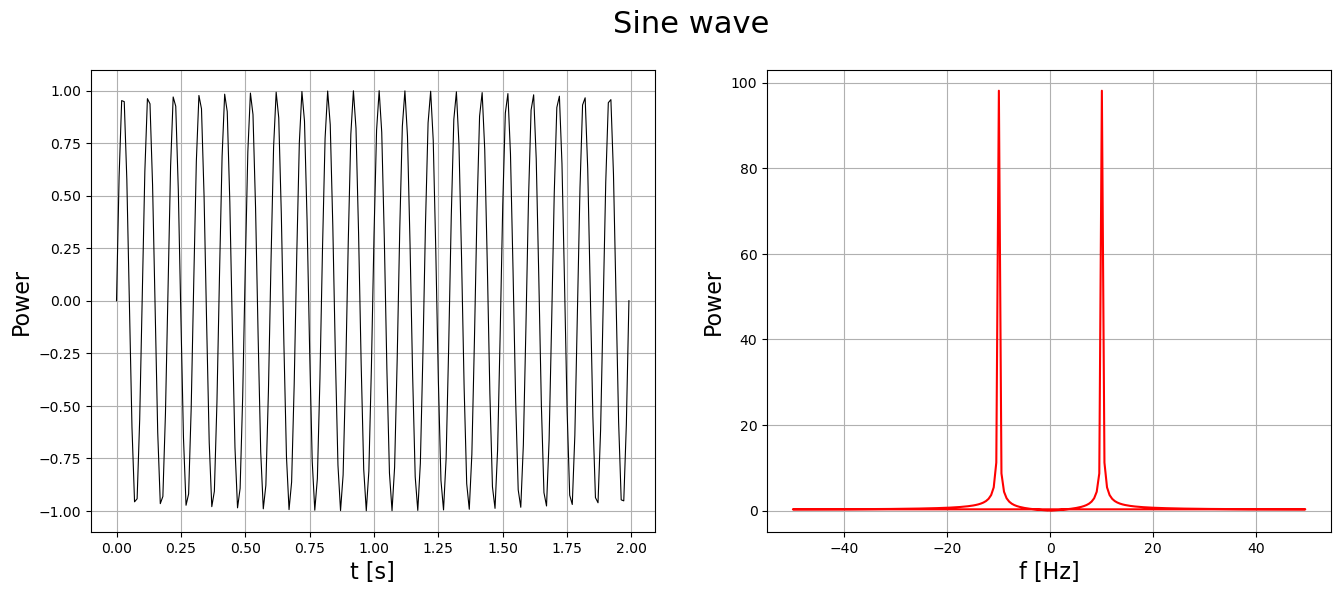

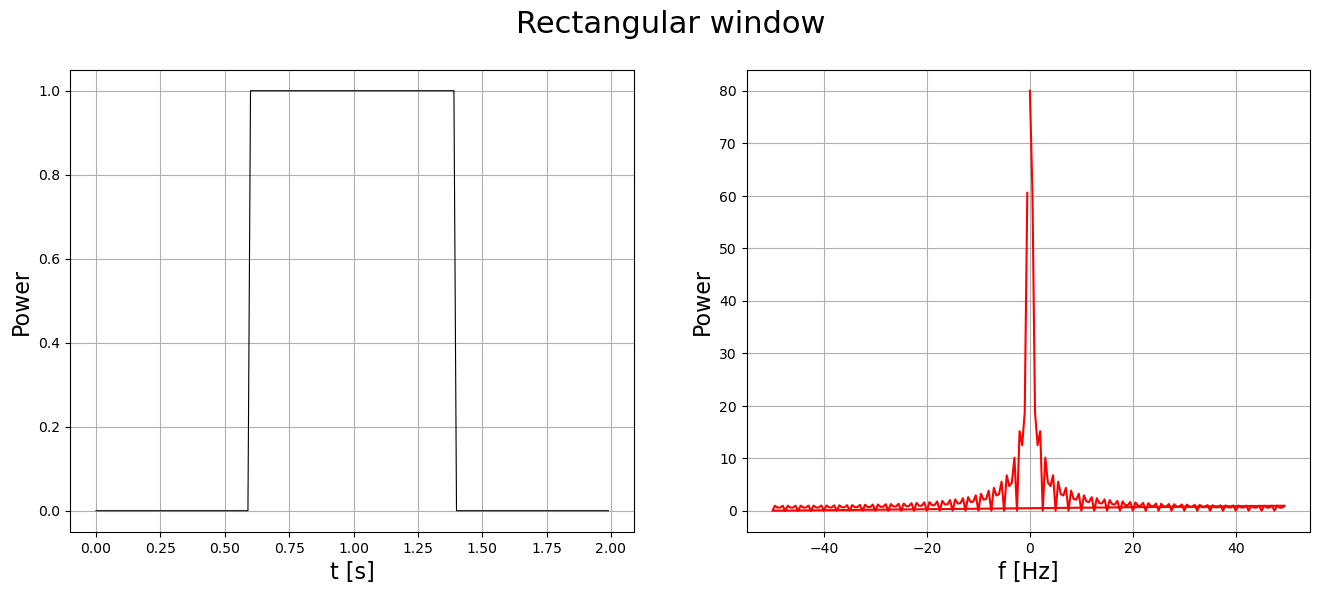

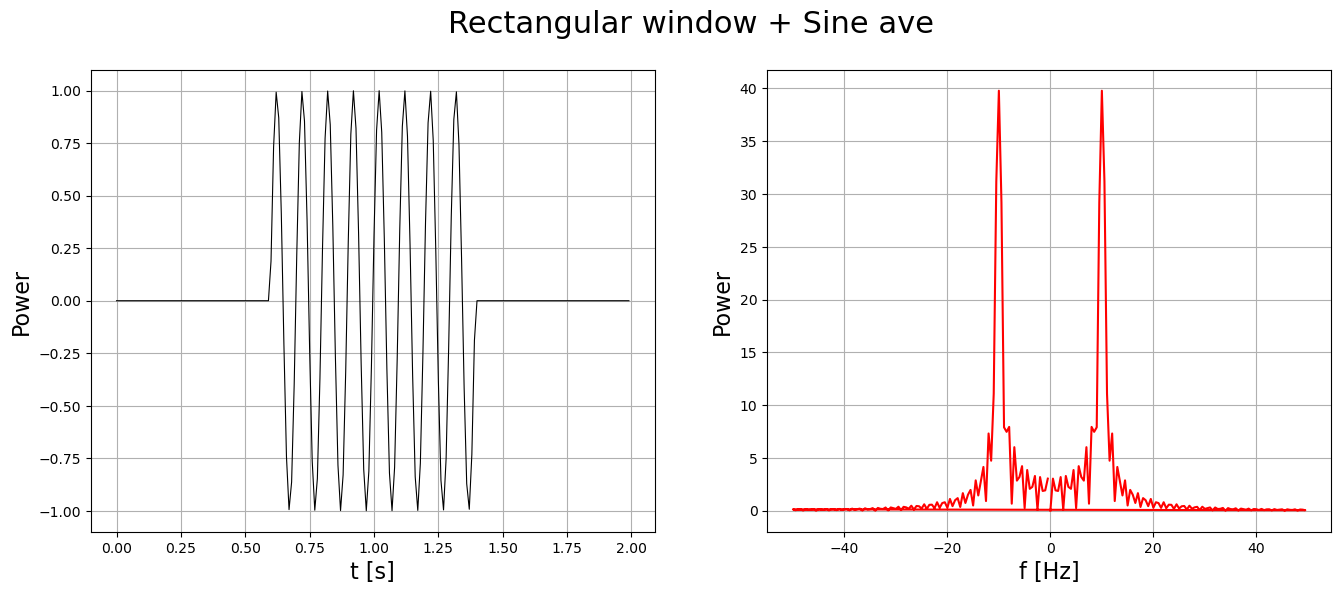

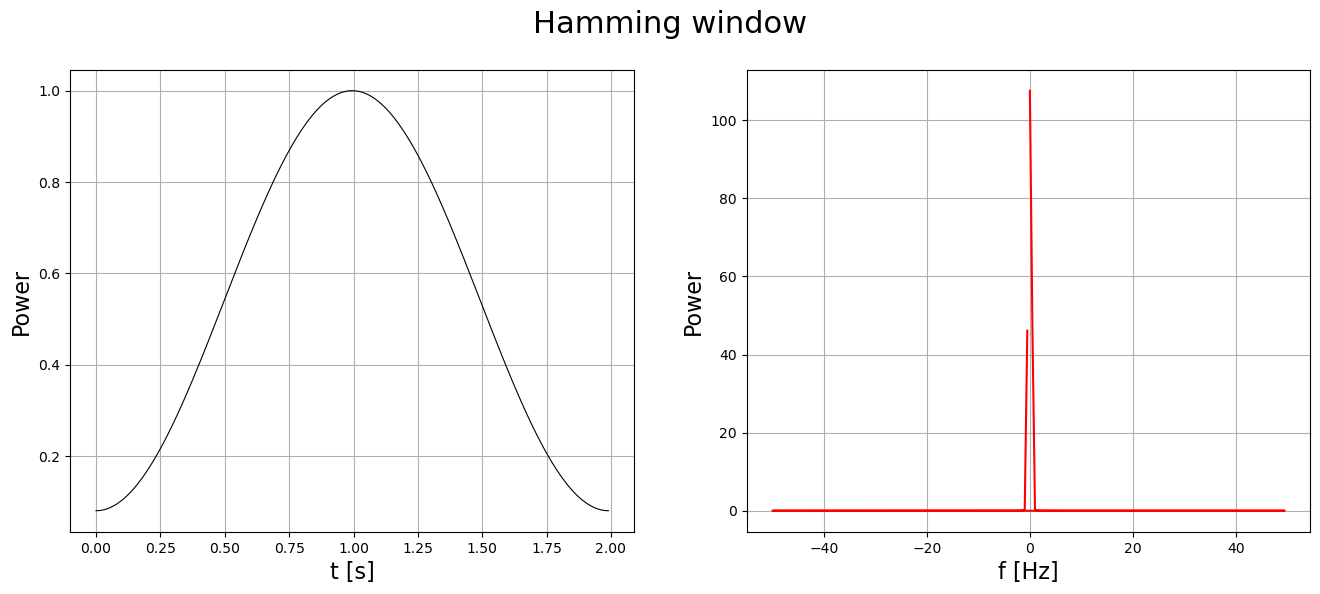

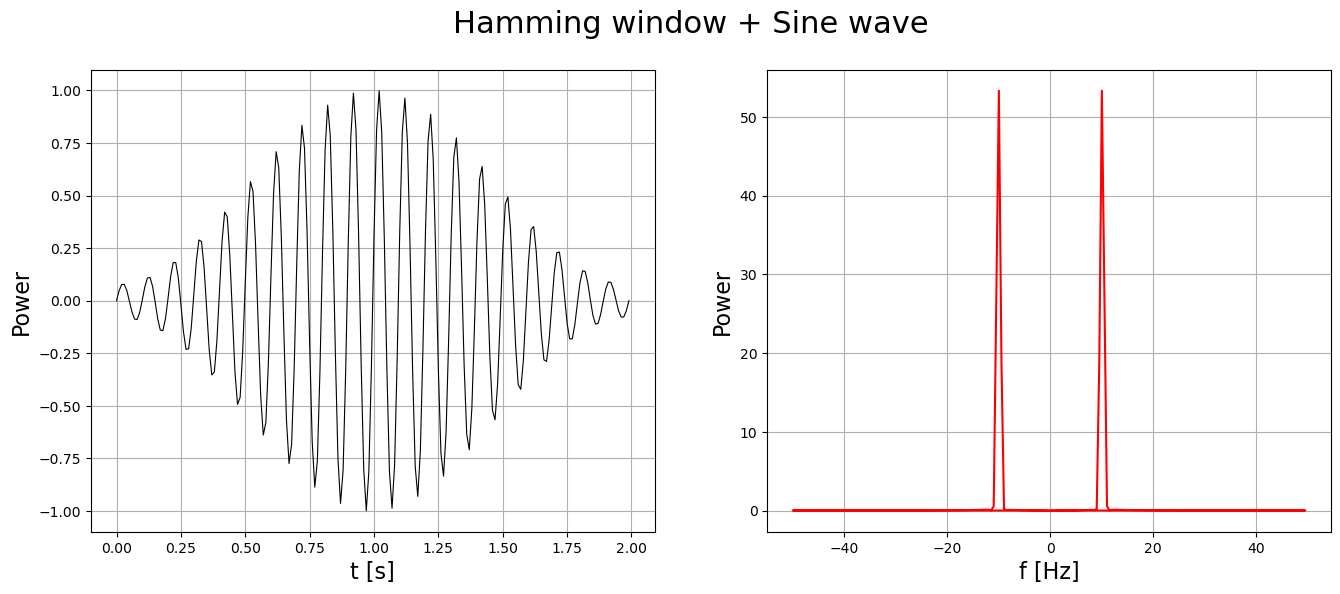

In [193]:
# parameters for infinite signal
"""
t - length of signal
dt - samples per time
f - frequency of the signal
"""
t, dt, f = 2, 100, 10
T = np.linspace(0, t, int(t * dt))

# Infinite signal
X_sin = np.sin(T * f * 2 * math.pi)
plot_signal(X_sin, dt, "Sine wave")

# Rectangular window
X_rect = np.zeros(int(dt * t))
X_rect[int(0.3*dt*t):int(0.7*dt*t)] = 1
plot_signal(X_rect, dt, "Rectangular window")

# Product of the rectangular window and the sine signal
plot_signal(X_rect * X_sin, dt, "Rectangular window + Sine ave")

# Hamming window
X_hamm = wd.hamming(int(t * dt))
plot_signal(X_hamm, dt, "Hamming window")

# Product of the Hamming window and the sine signal
plot_signal(X_hamm * X_sin, dt, "Hamming window + Sine wave")

# Nyquist theorem
In this section, the Nyquist-Shannon sampling theorem is showcased. It states that the sufficient sampling rate to completly determin the true signal is equal to $f_{N}=2f_{max}$, where $f_{max}$ is the highest frequency observed in a signal. Such frequency is called Nyquist frequency. We consider a sine wave of frequency $f$. Two sampling rates, below and above it to demostrate the need for it to be at least twice as big as the frequency. A viewer should observe, that only with higher sampling rate, the Fourier Transform has its peaks in true frequency.

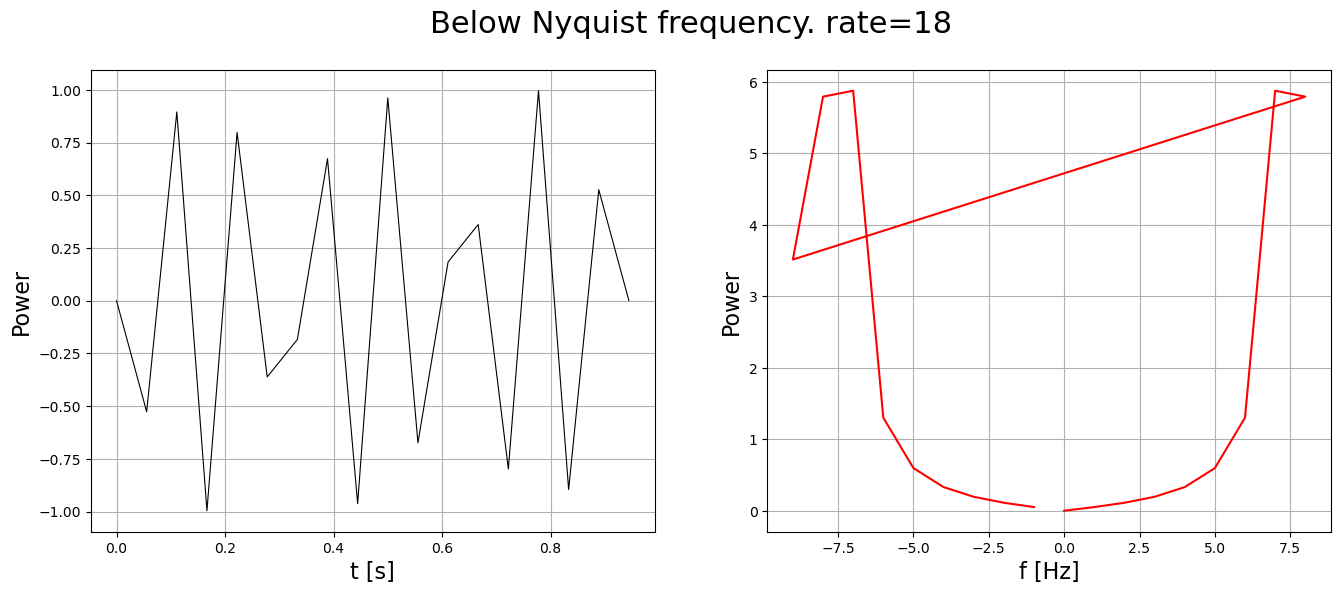

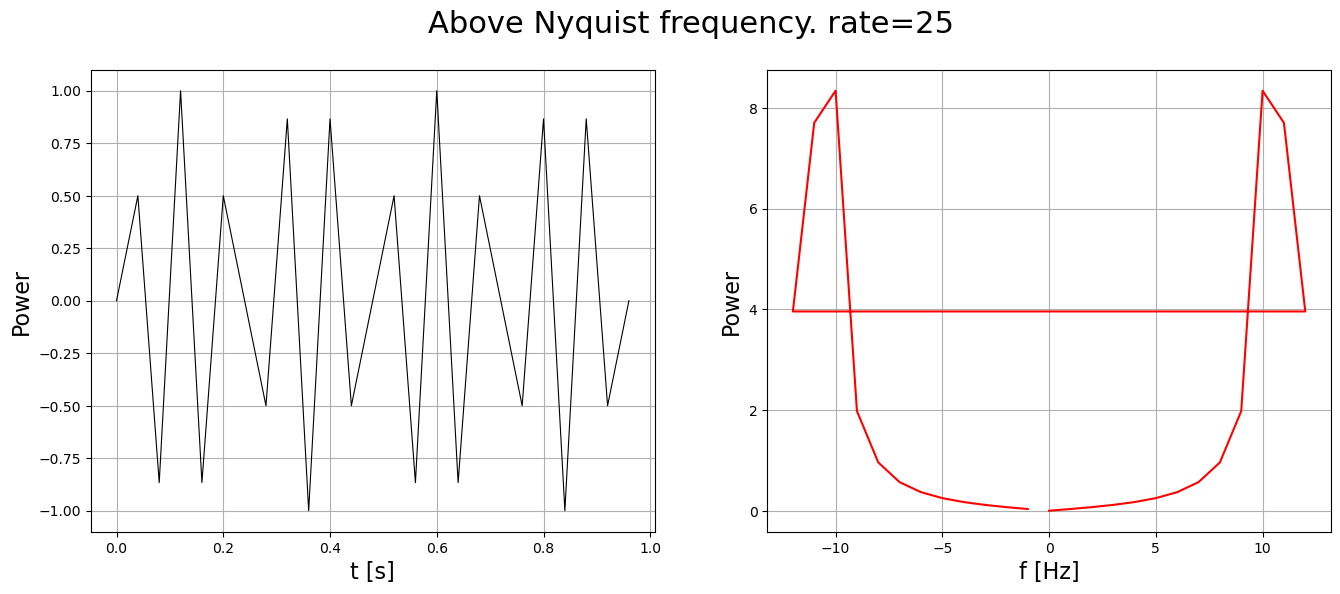

In [194]:
f = 10
rate1, rate2 = 18, 25
T1 = np.linspace(0, 1, rate1)
X1 = np.sin(T1 * 2 * math.pi * f)
T2 = np.linspace(0, 1, rate2)
X2 = np.sin(T2 * 2 * math.pi * f)
plot_signal(X1, rate1, f"Below Nyquist frequency. rate={rate1}")
plot_signal(X2, rate2, f"Above Nyquist frequency. rate={rate2}")

# Musical signal
The musical signal is used in this section and can be found at the following link [(path in local device)](../sounds/chord.wav). Two techniques are tested:
1. **Zero-padding** is a method which elongates the signal by adding zero values at the end. The optimal length of the signal should be one of the powers of 2. Then, the algorithm for calculating FFT is the fastest. This method can increase the resolution of the spectrum as it adds more points to the plot. However, it doesn't mean that vanishing peaks will be found. It can be obtained by adding more data (for instance, sampling full period T, [source](https://www.bitweenie.com/listings/fft-zero-padding/))
2. **Upsampling** can be done by inserting zero values in evenly spaced distance into the signal data. It modifies the spectrum immensly. New picks can be observed on the plot.

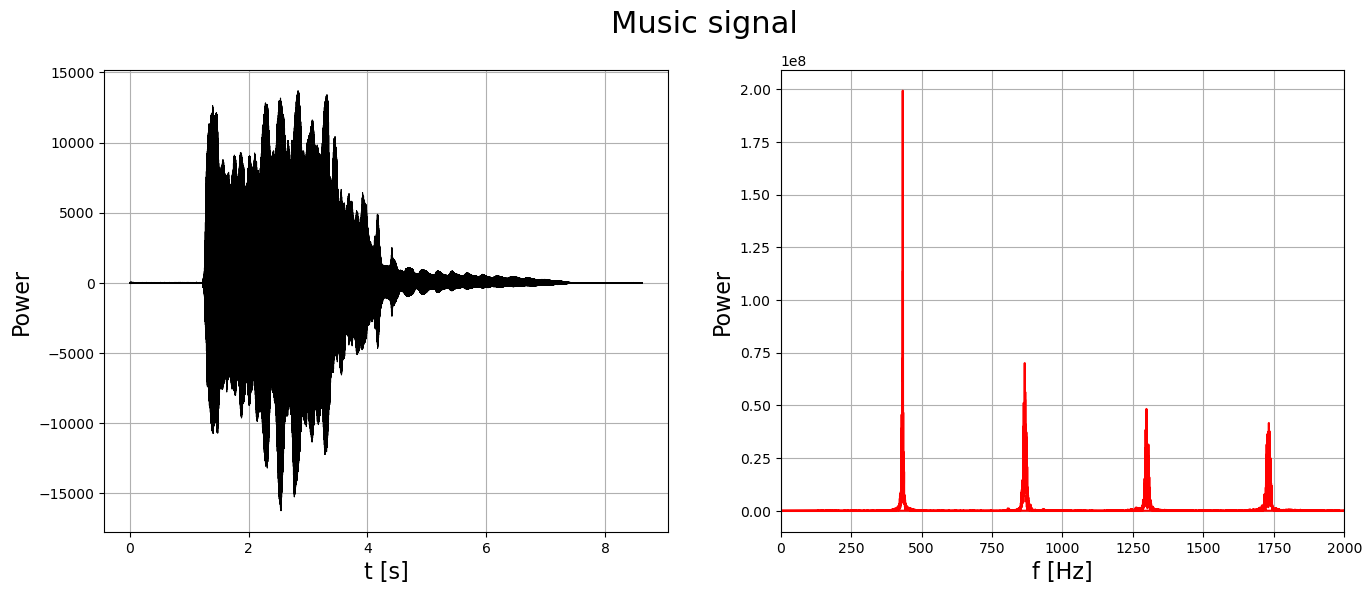

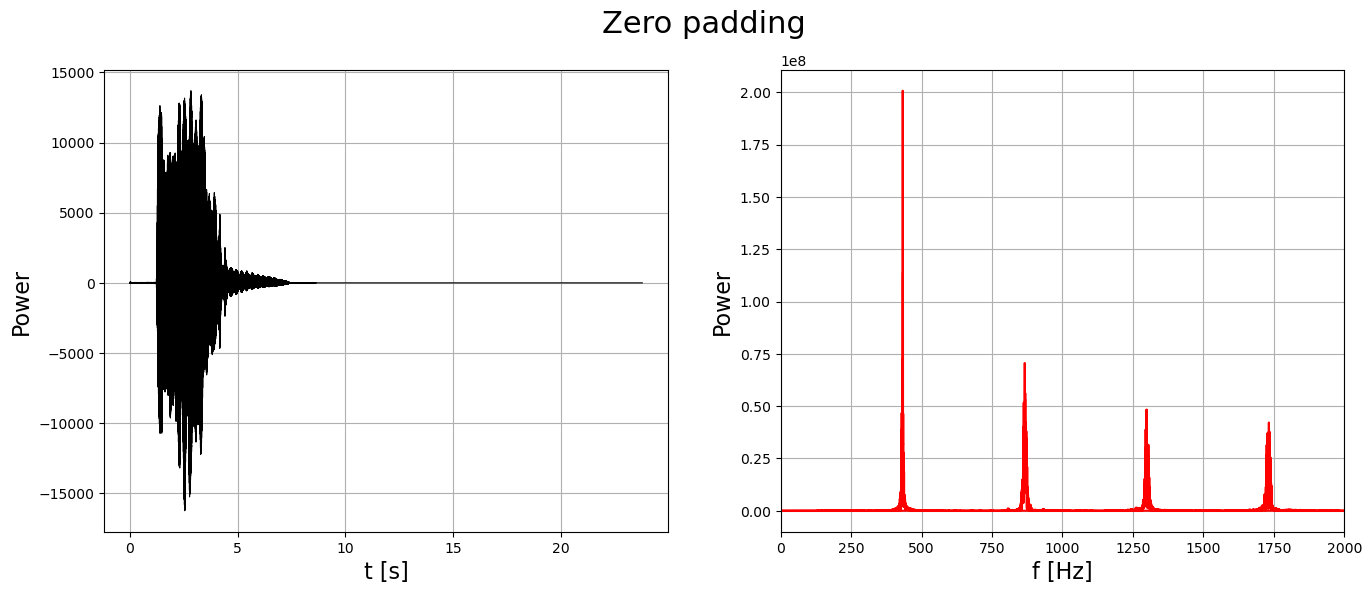

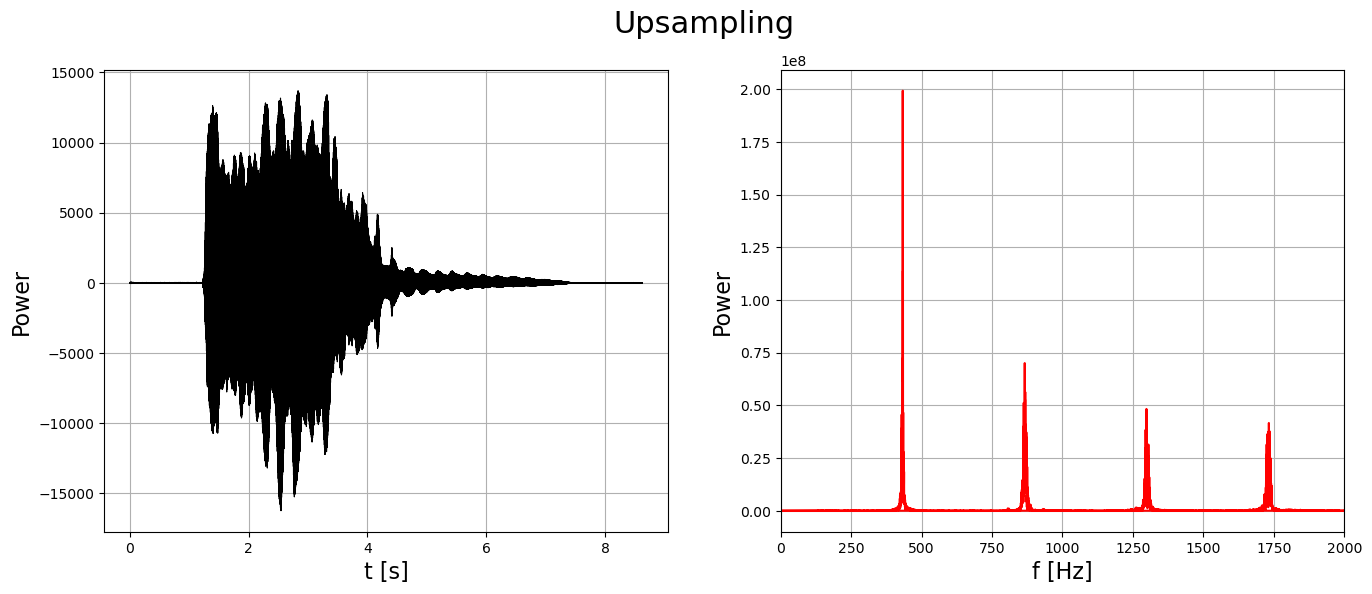

In [195]:
rate, data = wavfile.read('../sounds/flet.wav')
data_len = len(data)
plot_signal(data, rate, "Music signal", xlim=(0, 2000))

scale = 2
X_pad = np.zeros(2**20)
X_pad[:data_len] = data
plot_signal(X_pad, rate, "Zero padding", xlim=(0, 2000))

scale = 2
X_up = np.zeros(scale * data_len)
X_up[::scale] = data
plot_signal(data, rate, "Upsampling", xlim=(0, 2000))

# Summary 
Considerable number of methods of signal transformation are presented in this exercise. Such variaty of options to aquire better results in signal analysis is great in limited world of measurments.